# Complex analysis example

Analyze a complex of two strands intended to form a bipedal walker with a duplex torso and single-stranded legs (Shin and Pierce, J Am Chem Soc, 2004).

Material: DNA    
Temperature: 23 C

Calculate the partition function, equilibrium pair probability matrix, MFE proxy structure(s), and a set of suboptimal structures within a specified free energy gap.

These calculations can alternatively be performed using Utilities commands (see the Utilities example notebook). 

In [67]:
# Import NUPACK Python module
from nupack import *

In [68]:
# Define physical model 
my_model = Model(material='dna', celsius=37)

# Define strands
# sequence_a = 'AGGG CCCC GGGG GGGT'.replace(' ', '')
# sequence_b = 'ACCC CCCC GGGG CCCT'.replace(' ', '')
sequence_a = 'AGCT'
sequence_b = 'AGCT'
a = Strand(sequence_a, name='a')
b = Strand(sequence_b, name='b')

# Define the complex of interest 
walker = Complex([a, b])

# Define the complex set to contain only one complex
my_set = ComplexSet(strands={a: 1e-6, b: 1e-6}, complexes=SetSpec(max_size=0, include=[walker]))

# Define the energy gap (kcal/mol) for calculating suboptimal structures
gap = 1.1 

# Analyze the complex 
# Calculate pfunc, pairs, mfe, subopt
my_result = complex_analysis(my_set, compute=['pfunc', 'pairs', 'mfe', 'subopt'], 
                             options={'energy_gap': gap}, model=my_model)
my_result

Complex,Pfunc,ΔG (kcal/mol),MFE (kcal/mol)
(a+b),3.2970e+4,-6.412,-5.211


In [69]:
# MFE proxy structure(s)
walker_result = my_result[walker] # result object for complex 'x'
print('\nMFE proxy structure(s) for walker (a+b):')
for i, s in enumerate(walker_result.mfe):
    print('    %2d: %s (%.2f kcal/mol)' % (i, s.structure, s.energy))

print('\nSuboptimal proxy structures for walker (a+b):')
for i, s in enumerate(walker_result.subopt):
    print('    %2d: %s (%.2f kcal/mol)' % (i, s.structure, s.energy))


MFE proxy structure(s) for walker (a+b):
     0: ((((+)))) (-5.21 kcal/mol)

Suboptimal proxy structures for walker (a+b):
     0: ((((+)))) (-5.21 kcal/mol)
     1: .(((+))). (-5.50 kcal/mol)
     2: (((.+.))) (-5.50 kcal/mol)
     3: .((.+.)). (-5.80 kcal/mol)


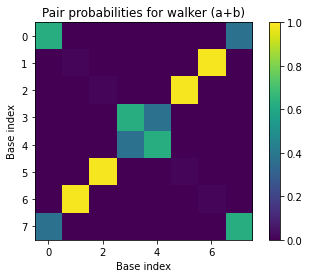

In [70]:
# Plot equilibrium pair probability matrix
import matplotlib.pyplot as plt
plt.imshow(walker_result.pairs.to_array())
plt.xlabel('Base index')
plt.ylabel('Base index')
plt.title('Pair probabilities for walker (a+b)')
plt.colorbar()
plt.clim(0, 1)

In [71]:
walker_result

nupack.analysis.ComplexResult({model: Model('stacking', 'dna04.json', T=310.15 K), pfunc: 32969.51190, free_energy: -6.411793671569341, mfe_stack: -5.21135139465332, pairs: [[0.6220 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.3780]
 [0.0000 0.0145 0.0000 0.0000 0.0000 0.0000 0.9855 0.0000]
 [0.0000 0.0000 0.0145 0.0000 0.0000 0.9855 0.0000 0.0000]
 [0.0000 0.0000 0.0000 0.6220 0.3780 0.0000 0.0000 0.0000]
 [0.0000 0.0000 0.0000 0.3780 0.6220 0.0000 0.0000 0.0000]
 [0.0000 0.0000 0.9855 0.0000 0.0000 0.0145 0.0000 0.0000]
 [0.0000 0.9855 0.0000 0.0000 0.0000 0.0000 0.0145 0.0000]
 [0.3780 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.6220]], mfe: [StructureEnergy(Structure('((((+))))'), energy=-5.21135139465332, stack_energy=-5.21135139465332)], subopt: [StructureEnergy(Structure('((((+))))'), energy=-5.21135139465332, stack_energy=-5.21135139465332), StructureEnergy(Structure('.(((+))).'), energy=-5.504890441894531, stack_energy=-5.0813517570495605), StructureEnergy(Structure('(((.+.)))'

In [72]:
arr = walker_result.pairs.to_array()
print(type(walker_result))
print(type(walker_result.pairs))
print(type(walker_result))

print(len(arr))
print(len(arr[0]))
import numpy as np
import sys
# np.set_printoptions(threshold=sys.maxsize) 
for row in arr:
#     print(str(row).replace('\n', ''))
    for col in row:
        print('{:.2f}'.format(col), end=' ')
    print('')
# print(arr)

<class 'nupack.analysis.ComplexResult'>
<class 'nupack.core.PairsMatrix'>
<class 'nupack.analysis.ComplexResult'>
8
8
0.62 0.00 0.00 0.00 0.00 0.00 0.00 0.38 
0.00 0.01 0.00 0.00 0.00 0.00 0.99 0.00 
0.00 0.00 0.01 0.00 0.00 0.99 0.00 0.00 
0.00 0.00 0.00 0.62 0.38 0.00 0.00 0.00 
0.00 0.00 0.00 0.38 0.62 0.00 0.00 0.00 
0.00 0.00 0.99 0.00 0.00 0.01 0.00 0.00 
0.00 0.99 0.00 0.00 0.00 0.00 0.01 0.00 
0.38 0.00 0.00 0.00 0.00 0.00 0.00 0.62 


In [73]:
import numpy as np
a = np.array([[1,2,3], [4,5,6], [5,9,1]])
print(a)
print(a > 5)
g5 = a > 5
print(a[a > 5])
print(np.all(a > -1))




[[1 2 3]
 [4 5 6]
 [5 9 1]]
[[False False False]
 [False False  True]
 [False  True False]]
[6 9]
True


In [74]:
print(len('TAAAATAAAATAAAATGCGCGCTTTTTGCGCGCTTTTT'))
print(len('ATTTTATTTTATTTTA'))

38
16
